# 주제 : 심부전증 분류 예측
## 데이터 소개
- 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.

- 다음 1개의 csv 파일을 사용합니다.
heart_failure_clinical_records_dataset.csv

- 각 파일의 컬럼은 아래와 같습니다.
    - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Step 1. 데이터 준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석
### 문제 4. 데이터프레임의 각 컬럼 분석하기

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
# info() Null 값 확인, 데이터 각 필드 특징값(타입) 확인
# 13개의 수치형 컬럼으로 구성되어 별도의 형태변환은 필요하지 않음
# 1-빈혈, 3-당뇨, 5-혈압, 9-성별, 10-흡연, 12-사망여부 = 범주형 데이터 셋
# 12번 사망여부는 y레이블값으로 처리해야 하므로 별도의 변환 X(0과 1로 구성)
# 그외 1, 3, 5, 9 필드는 더미변수 처리여부를 결정해야 함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
# describe() 기술통계 확인, 분포도 확인
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

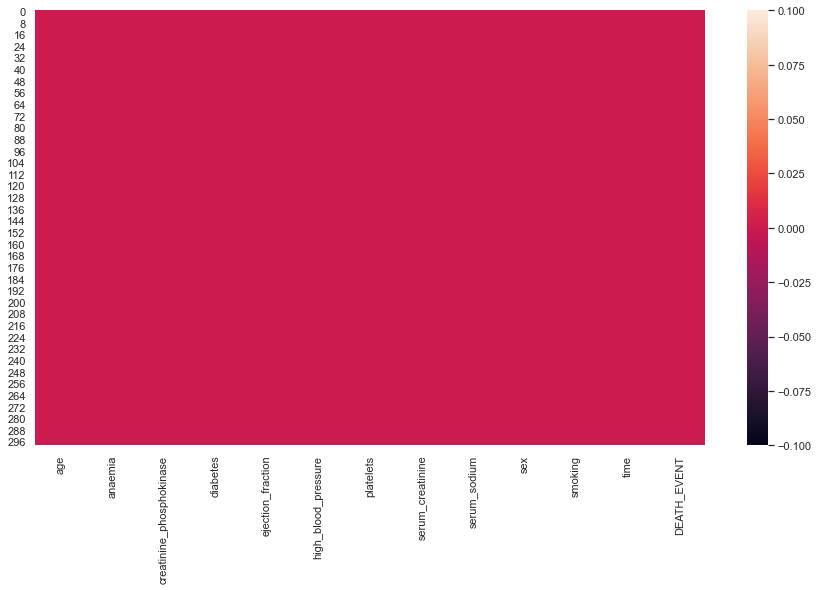

In [24]:
# na 시각화
# 결측치 없음
sns.heatmap(df.isnull())
plt.show()

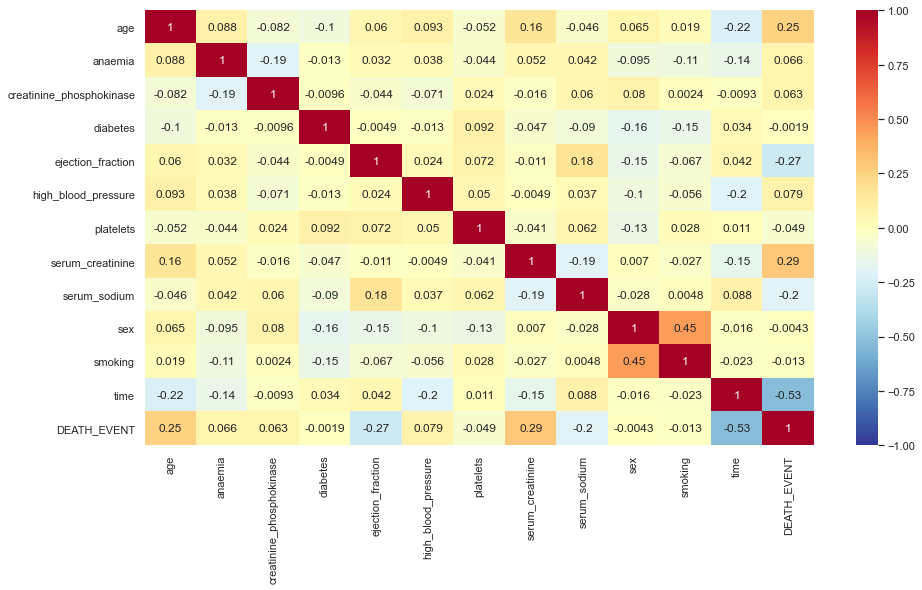

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
sns.set(rc = {'figure.figsize':(15,8)})

In [23]:
# 미션에 없음
# 예를 들어 고객의 나이가 대부분 90이하라면 이 데이터 셋은 제거하고 작업해도 됨
df[df['age']>90]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


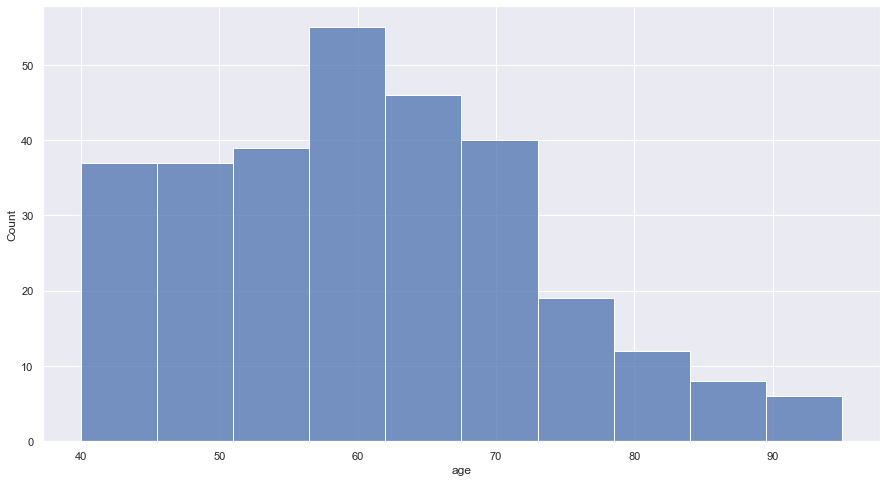

In [25]:
# df.describe() 에서 age에 대한 해석에 도움 됨.
# 70대 이상 데이터가 부족함
sns.histplot(data=df, x='age')
plt.show()

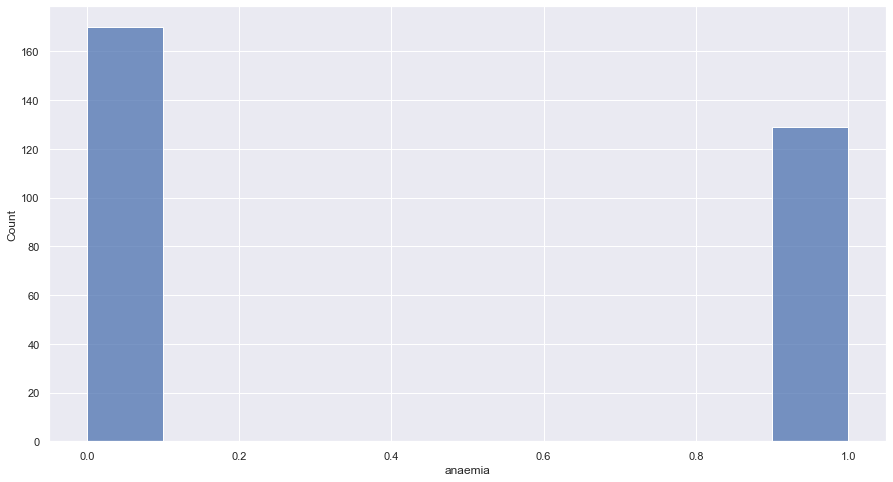

In [26]:
# 빈혈은 정상인 사람 비중이 많음
sns.histplot(data=df, x='anaemia')
plt.show()

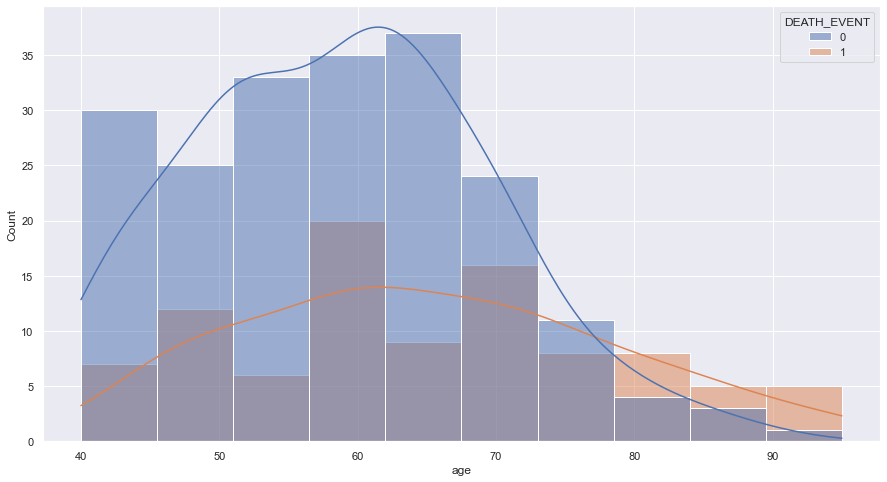

In [27]:
# 해석할때 groupby로 수치값으로 표현해서 작업해보면 더 이해가 빠름
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True)
plt.show()

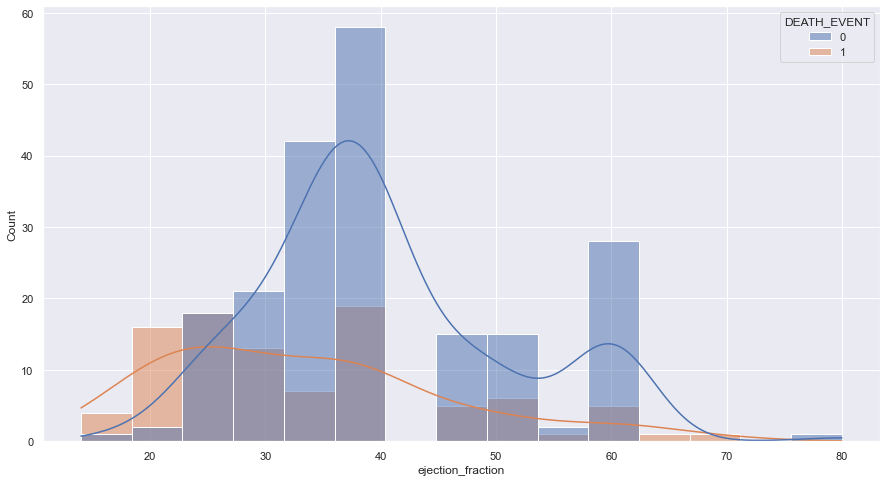

In [28]:
# 박출계수
# 박출계수가 낮을수록 사망율이 증가함
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()

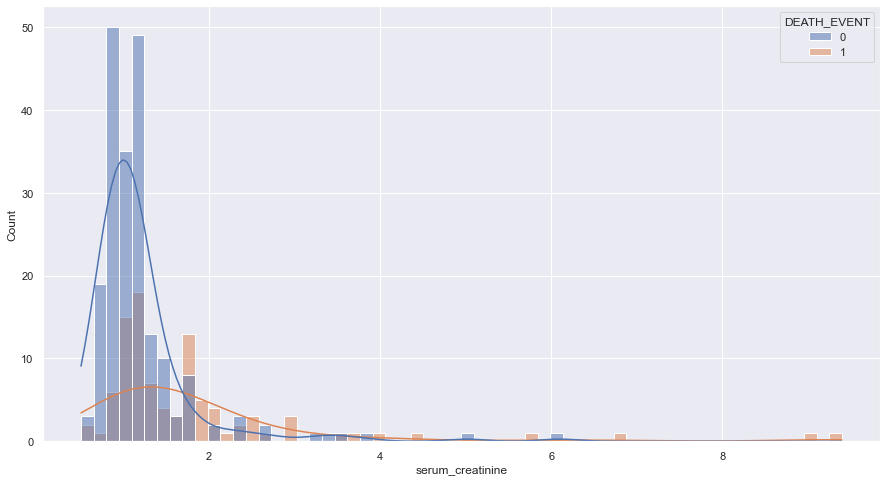

In [29]:
# 혈중크레아틴 레벨
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()

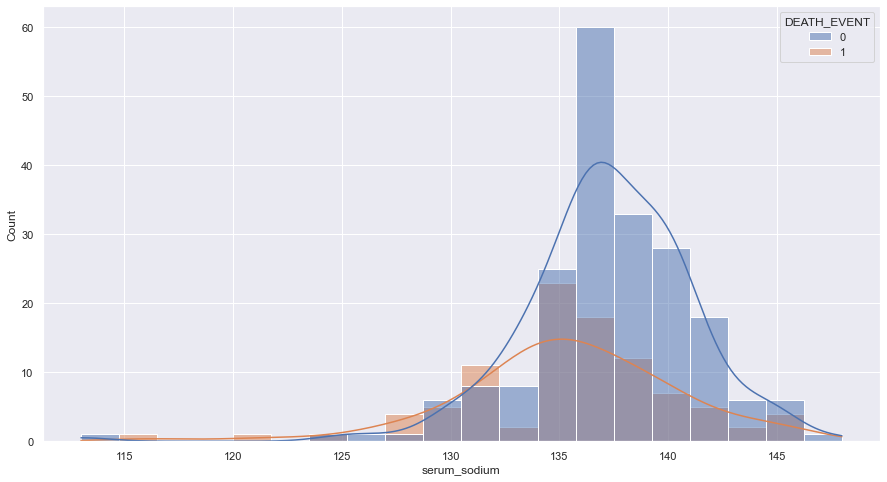

In [30]:
# 혈중 나트륨 레벨
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', kde=True)
plt.show()

In [31]:
# 130 이하 (22) 데이터가 145이상 (11), 일 경우 사망 확률이 높음
df.pivot_table('DEATH_EVENT', 'serum_sodium')

,DEATH_EVENT
serum_sodium,
113,0.000000
116,1.000000
121,1.000000
124,1.000000
125,0.000000
126,0.000000
127,1.000000
128,0.500000
129,1.000000


## Step 3. 모델학습을 위한 데이터 전처리
### StandardScaler를 이용하여 데이터 전처리하기

In [34]:
from sklearn.preprocessing import StandardScaler

In [32]:
# 값의 범위가 평균 0, 분산 1이 될 수 있도록 값을 일정한 범위로 조정, 
# x값의 값이 크면 y값에 영향을 많이줌, 그러한 일이 없게 값의 단위를 같게 조정.
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기

# 1-빈혈, 3-당뇨, 5-혈압, 9-성별, 10-흡연, 12-사망여부 = 범주형 데이터 셋
# 12번 사망여부는 y레이블값으로 처리해야 하므로 별도의 변환 X(0과 1로 구성)
# 그외 1, 3, 5, 9 필드는 더미변수 처리여부를 결정해야 함

X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']


In [35]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)                 # 훈련
X_scale = scaler.transform(X_num) # 데이터 변환
# X_scale = scaler.fit_transform(X_num) # 같이 할수도 있음

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_scale1 = pd.DataFrame(data = X_scale, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scale1, X_cat], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


In [36]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기
### Logistic Regression 모델 생성/학습하기

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_lr = LogisticRegression()     # 옵션 없음
model_lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력하기
# recall(재현율) 생존자(0)는 0.92로 잘 맞으나, 사망자(1)에 대한 재현율은 0.35로 잘 안맞아, 결과값이 0.76으로 낮음

pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [40]:
#  1값이 예측이 잘 안되어 있음 그래서 1값 중 예측이 안맞는 것만 꺼내서 확인 해보려 함
pred = model_lr.predict(X_test)

cnt=0; tmpList=[]
for i, j in zip(y_test, pred):
    if i == j:
        tmpList.append({'y':i, 'pred':j, "re" : "O"})
    else:
        tmpList.append({'y':i, 'pred':j, "re" : "X"})

tmp = pd.DataFrame(tmpList)

tmp[(tmp['y'] == 1) & (tmp['re']=='X')].index

Int64Index([2, 8, 12, 14, 21, 45, 48, 49, 64, 65, 69, 72, 79, 82, 84, 86, 89], dtype='int64')

### .XGBoost 모델 생성/학습하기

In [42]:
from xgboost import XGBClassifier

In [43]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[18:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\baekj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



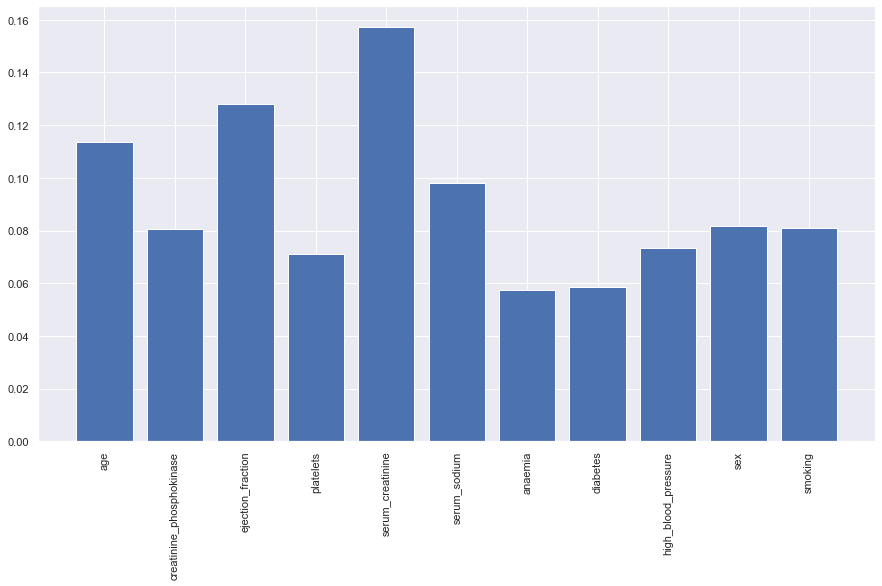

In [45]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step 5. 모델 학습 결과 심화 분석하기

In [50]:
from sklearn.metrics import plot_precision_recall_curve

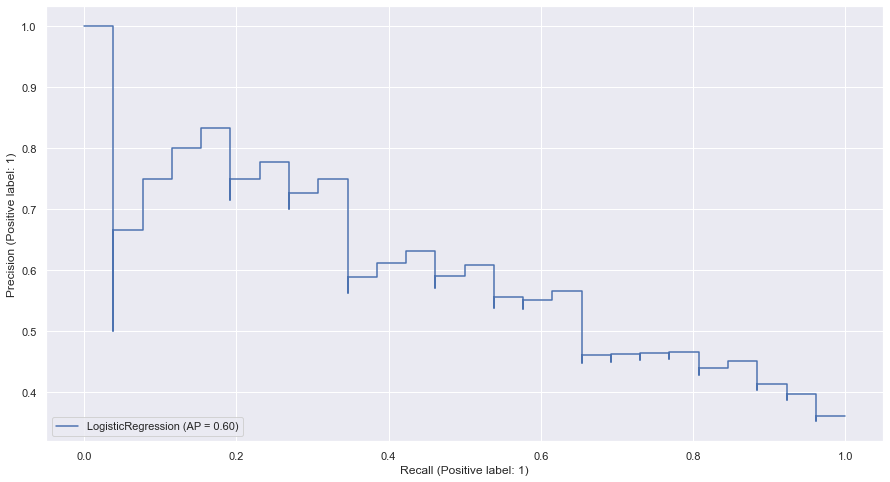

In [56]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

# y축: Precision(정밀도)의 공식 찾기 T or F 실제값이 1인데 예측이 1 / (실제값이1인데 예측이 1 + 실제값이 1인데 예측이 0) 1이 되는 값

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
#plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

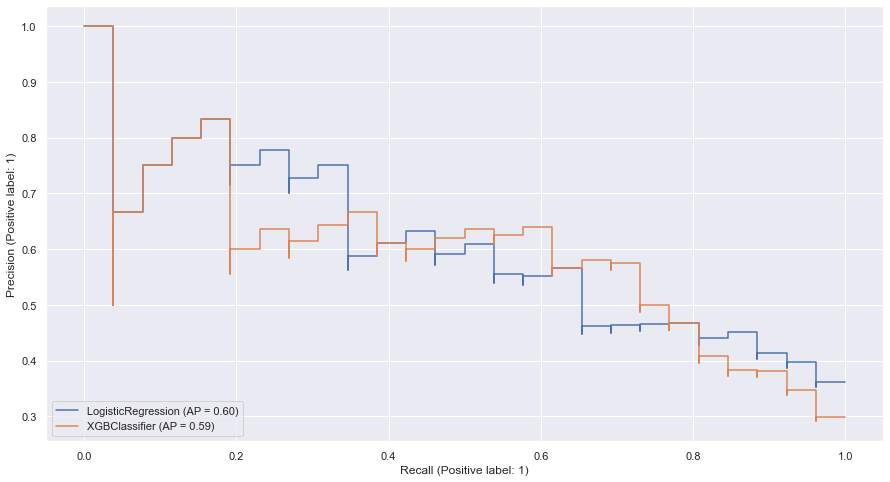

In [51]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

In [52]:
from sklearn.metrics import plot_roc_curve

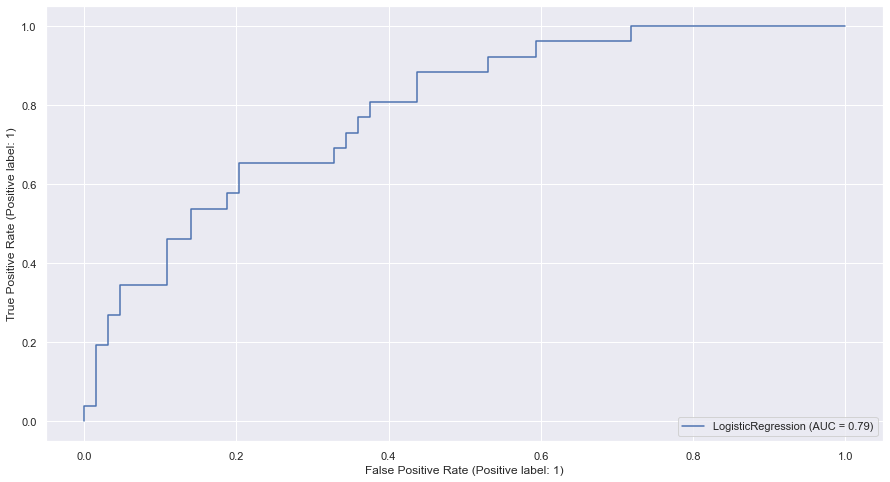

In [55]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
#plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

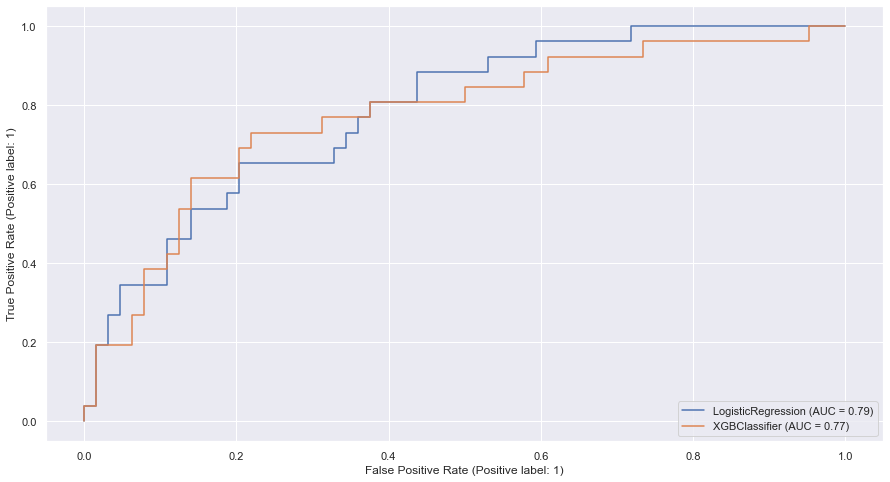

In [53]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)